In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.simulate_prices_gbm import simulate_gbm
from utils.get_weights import get_weights

### Obtain GBM Simulation for assets prices

In [2]:
# weights
risk_free_rate = 0.05
market_return = 0.5

# Obtain historical prices
df = pd.read_csv('data/historical_prices.csv')
# Run GBM simulation
T = 1
dt = 1/365
prices_gbm = simulate_gbm(df, T, dt)
prices_gbm

,BTC,ETH,BNB,SOL,USDC,XRP,DOGE,ADA,SHIB,AVAX,...,FDUSD,WIF,GRT,TAO,SUI,OP,VET,AR,FLOKI,MKR
0,69649.990000,3617.850000,630.400000,158.860000,1.000100,0.494800,0.149500,0.442300,0.000023,33.720000,...,0.999300,2.753600,0.268600,366.500000,1.035200,2.185000,0.031720,34.994000,0.000236,2338.000000
1,70126.076355,3581.557204,635.066126,159.241626,0.997515,0.498073,0.148542,0.442999,0.000023,33.523739,...,0.997798,2.774083,0.269042,369.291040,1.024469,2.167677,0.031791,35.080176,0.000235,2313.189359
2,70471.395344,3598.767263,635.713774,159.312099,1.000603,0.499378,0.148931,0.440654,0.000023,33.526327,...,1.009219,2.781784,0.269453,369.414389,1.027587,2.177988,0.031944,35.105913,0.000236,2320.346425
3,69451.685537,3607.237202,633.679256,158.590197,0.993274,0.500675,0.149071,0.440722,0.000023,33.611425,...,1.015640,2.792856,0.268904,367.276597,1.027775,2.173489,0.032206,34.668498,0.000238,2337.454744
4,69070.644700,3612.270834,630.793040,157.619170,1.000511,0.504180,0.149401,0.437293,0.000023,33.596322,...,1.002365,2.798173,0.268508,364.355478,1.026426,2.169674,0.032231,34.776214,0.000237,2344.554106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,59116.269718,3517.804280,627.889508,170.279424,0.915961,0.527663,0.155139,0.503688,0.000022,38.557876,...,0.974532,2.391018,0.246279,289.270071,1.006704,2.352079,0.034541,28.663766,0.000250,2217.386443
361,59001.593704,3501.714122,632.021621,169.472043,0.916862,0.529246,0.155824,0.502191,0.000022,38.849262,...,0.965655,2.376164,0.245889,287.539537,1.003636,2.347248,0.034183,28.226935,0.000247,2216.653166
362,58872.138548,3487.235568,633.600339,170.527965,0.919354,0.530649,0.154908,0.498874,0.000022,38.810894,...,0.960748,2.358985,0.242752,289.244962,1.009236,2.365734,0.034384,28.224136,0.000249,2209.609709
363,59569.847156,3514.019256,634.849048,172.283910,0.926539,0.532221,0.155051,0.500330,0.000022,39.360781,...,0.973149,2.386547,0.244825,290.120168,1.013853,2.387226,0.034434,28.059371,0.000248,2214.588225


### Obtain returns lists

In [3]:
# Obtain returns lists
returns = prices_gbm.pct_change()
eth = prices_gbm['ETH']
eth_returns = eth.pct_change()

returns = returns.replace([np.nan, np.inf, -np.inf], 0)
eth_returns = eth_returns.replace([np.nan, np.inf, -np.inf], 0)

returns

,BTC,ETH,BNB,SOL,USDC,XRP,DOGE,ADA,SHIB,AVAX,...,FDUSD,WIF,GRT,TAO,SUI,OP,VET,AR,FLOKI,MKR
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.006835,-0.010032,0.007402,0.002402,-0.002584,0.006615,-0.006407,0.001581,0.008786,-0.005820,...,-0.001503,0.007439,0.001644,0.007615,-0.010366,-0.007928,0.002228,0.002463,-0.006095,-0.010612
2,0.004924,0.004805,0.001020,0.000443,0.003095,0.002620,0.002621,-0.005294,-0.012207,0.000077,...,0.011446,0.002776,0.001528,0.000334,0.003043,0.004757,0.004834,0.000734,0.006923,0.003094
3,-0.014470,0.002354,-0.003200,-0.004531,-0.007324,0.002598,0.000939,0.000155,-0.001219,0.002538,...,0.006363,0.003980,-0.002037,-0.005787,0.000184,-0.002066,0.008200,-0.012460,0.007668,0.007373
4,-0.005486,0.001395,-0.004555,-0.006123,0.007286,0.007000,0.002211,-0.007781,0.000029,-0.000449,...,-0.013071,0.001904,-0.001472,-0.007953,-0.001313,-0.001755,0.000772,0.003107,-0.003146,0.003037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-0.002176,0.002611,-0.003140,0.001987,-0.004803,0.001509,0.002217,0.000073,-0.003186,0.008644,...,0.002688,0.008881,-0.006050,0.007973,0.002476,0.001528,0.005702,0.001954,-0.000981,0.000292
361,-0.001940,-0.004574,0.006581,-0.004742,0.000983,0.003002,0.004417,-0.002972,0.002700,0.007557,...,-0.009108,-0.006213,-0.001582,-0.005982,-0.003048,-0.002054,-0.010365,-0.015240,-0.011883,-0.000331
362,-0.002194,-0.004135,0.002498,0.006231,0.002718,0.002649,-0.005878,-0.006607,-0.000779,-0.000988,...,-0.005082,-0.007230,-0.012759,0.005931,0.005580,0.007876,0.005874,-0.000099,0.008289,-0.003178
363,0.011851,0.007680,0.001971,0.010297,0.007815,0.002962,0.000926,0.002920,0.005510,0.014168,...,0.012908,0.011684,0.008540,0.003026,0.004575,0.009085,0.001444,-0.005838,-0.001722,0.002253


### Get min variance optimiation weights and max sharpe weights

In [7]:
# Get weights
weights = get_weights(risk_free_rate, market_return, prices_gbm)
min_variance_weights = weights['Min Weight']
max_sharpe_weights = weights['Max Weight']

# Extract non zero weight assets
filtered_max_sharpe= weights[weights['Max Weight'] != 0]
filtered_min_var= weights[weights['Min Weight'] != 0]

# Create a sub-dictionary with non-zero values
filtered_dict = dict(zip(filtered_min_var['Names'], filtered_min_var['Min Weight']))
# filtered_dict = dict(zip(filtered_max_sharpe['Names'], filtered_max_sharpe['Max Weight']))


print(filtered_dict)

{'BCH': 1.0}


### Run a simulation of portfolio assets vs eth

In [8]:
# Calculate total weighted assets
portfolio_sum = 0

for key, value in filtered_dict.items():
    portfolio_sum += returns[key] * value

portfolio_sum = portfolio_sum.fillna(0) 
eth_returns = eth_returns.fillna(0) 

# Simulate portfolio returns
n = len(eth_returns.index)
portfolio_eth = np.zeros(n)
portfolio_assets = np.zeros(n)
v0 = 1000
portfolio_eth[0] = v0
portfolio_assets[0] = v0


for i in range (1, n):
    portfolio_eth[i] = (1+eth_returns[i-1])*portfolio_eth[i-1]
    portfolio_assets[i] = (1+portfolio_sum[i-1])*portfolio_assets[i-1]

### Plot results

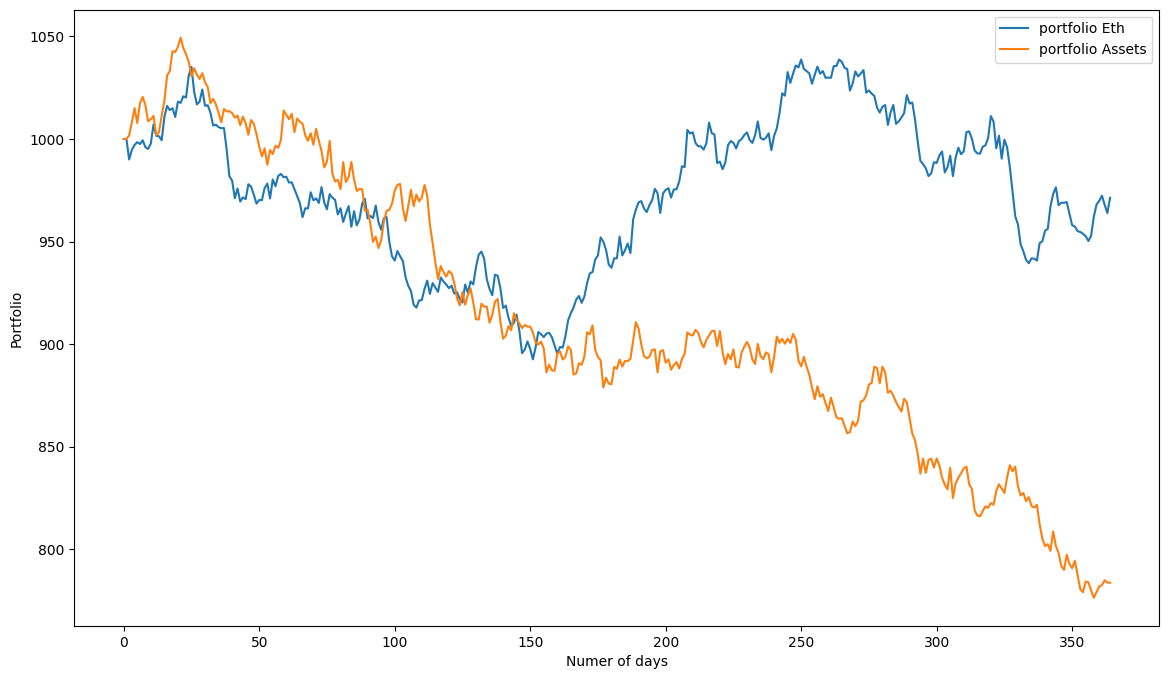

In [9]:
# Plot
plt.figure(figsize=(14, 8))
plt.plot(portfolio_eth , label='portfolio Eth')
plt.plot(portfolio_assets , label='portfolio Assets')
plt.legend()
plt.xlabel('Numer of days')
plt.ylabel('Portfolio')
plt.show()